In [1]:
from gibbs.dataclass import GibbsResult,get_results
import numpy as np
from gibbs.utils import simple_purify_hamiltonian,printarray,spectral_dec,candidate, lattice_hamiltonian
import matplotlib.pyplot as plt
from gibbs.learning.bayesian_learning_v2 import BayesianLearning
from gibbs.learning.constraint_matrix import ConstraintMatrixFactory
from gibbs.plots.plots import compare_preparations, axis_locality,preparation
import plotly.express as px
from qiskit.quantum_info import state_fidelity

%load_ext autoreload
%autoreload 2


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

result = get_results("../scripts_lap/job_13_qasm")[0]

cmat = ConstraintMatrixFactory(result.num_qubits,2,3)
K,E = cmat.create_cmat(result.state_vector(-1),shots:=1e9)
# px.histogram((E[np.nonzero(E)]),histnorm="percent").show()
E_bool = (E != 0)
# print(E.shape,cmat.sampling_basis.size)
E_sign = np.sign(K)[:,:,None]*E_bool
# print(np.linalg.norm(E_sign[-1],ord = 2))

# create some data
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(111)
paulis_indexes = [1,50,100,125,150,175,200]
paulis_list = [cmat.sampling_basis.paulis_list[i] for i in paulis_indexes]
# print(paulis_list)
data = np.einsum("ijk,k->ji",E_bool[:,:,paulis_indexes],paulis_indexes)
# data = 255- data
# data[data==0] = 0
# get the unique values from data
# i.e. a sorted list of all values in data
values = np.unique(data.ravel())
# print(values)


colors = ["darkorange", "gold", "lawngreen", "lightseagreen", "blue" , "red"]
color_palette = ["white"]
for c in colors:
    color_palette += [c]*300
cmap = ListedColormap(colors = color_palette)
# print(cmap(2))
im = ax.imshow(data, interpolation='none',cmap=cmap)

# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
# print(im.norm(values[1]))
# create a patch (proxy artist) for every color
patches = [ mpatches.Patch(color=colors[i+1], label=paulis_list[i]) for i in range(len(values)-1) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches,
           bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0.,
           fontsize=20)

# plt.grid(True)
plt.xticks([])
plt.yticks([])
ax.set_xlabel("Constraint Basis",fontsize=20)
ax.set_ylabel("Learning Basis",fontsize=20)

print(data.shape)
plt.savefig("../figures/constraintmatrix.png",format="png")
plt.show()

ValueError: This configuration of ansatz does not start in identity.

This is the graphic that shows that our ansatz doesn't capture some of the terms in the Hamiltonian.

In [ ]:
from qiskit.circuit.library import EfficientSU2
from gibbs.preparation.varqite import efficientTwoLocalansatz
qc = EfficientSU2(6,reps=2,entanglement="reverse_linear",su2_gates=["rx","rz","rx"],insert_barriers=True).decompose()
qc.barrier()
qc.h(range(0,qc.num_qubits,2))
qc.cx(range(0,qc.num_qubits,2),range(1,qc.num_qubits,2))
print(qc.draw(output="latex_source"))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{R_X}\,(\mathrm{{\ensuremath{\theta}}[0]})} & \gate{\mathrm{R_Z}\,(\mathrm{{\ensuremath{\theta}}[6]})} & \gate{\mathrm{R_X}\,(\mathrm{{\ensuremath{\theta}}[12]})} \barrier[0em]{5} & \qw & \qw & \qw & \qw & \qw & \ctrl{1} \barrier[0em]{5} & \qw & \gate{\mathrm{R_X}\,(\mathrm{{\ensuremath{\theta}}[18]})} & \gate{\mathrm{R_Z}\,(\mathrm{{\ensuremath{\theta}}[24]})} & \gate{\mathrm{R_X}\,(\mathrm{{\ensuremath{\theta}}[30]})} \barrier[0em]{5} & \qw & \qw & \qw & \qw & \qw & \ctrl{1} \barrier[0em]{5} & \qw & \gate{\mathrm{R_X}\,(\mathrm{{\ensuremath{\theta}}[36]})} & \gate{\mathrm{R_Z}\,(\mathrm{{\ensuremath{\theta}}[42]})} & \gate{\mathrm{R_X}\,(\mathrm{{\ensuremath{\theta}}[48]})} \barrier[0em]{5} & \qw & \gate{\mathrm{H}} & \ctrl{1} & \qw & \qw\\
	 	\nghost{{q}_{1}

In [ ]:
results = get_results("../saved_simulations/turbo/YYtermsheisenberg")
YY_weights = [np.real(r.hamiltonian.coeffs[7]) for r in results]
titles = [f"YY = {w}" for w in YY_weights]
compare_preparations(results,titles,2)
expected_state = simple_purify_hamiltonian(lattice_hamiltonian(4,0.25,-1,["Z"],["XX","ZZ"]))
infidelities = [1-state_fidelity(r.state_vector(-1),expected_state) for r in results]
px.scatter(x=YY_weights,y=infidelities,log_y=False).show()

In [ ]:
results = get_results("../saved_simulations/turbo/allcontrols4heisenberg")
fig = preparation(results[0],-1)
fig.update_layout(legend={"yanchor":"bottom","y":0.01,"xanchor":"right","x":0.99})
fig.show()
print(results[0].betas)
print(results[0].fidelity(-1))

[0.0, 0.00019999999999999998, 0.0022, 0.0222, 0.2222, 1.0]
0.5371181909758428


In [ ]:
results = get_results("../saved_simulations/turbo/allcontrols4ising")
fig = preparation(results[0],-1)
fig.update_layout(legend={"yanchor":"bottom","y":0.01,"xanchor":"right","x":0.99})
fig.show()
print(results[0].betas)
print(1-results[0].fidelity(-1))

[0.0, 0.00019999999999999998, 0.0022, 0.0222, 0.2222, 0.4222, 0.6222000000000001, 0.8222, 1.0]
0.007616588471520691


In [ ]:
results = get_results("../saved_simulations/turbo/random1localheisenberg")
fig = preparation(results[1],-1)
fig.update_layout(legend={"yanchor":"bottom","y":0.01,"xanchor":"right","x":0.99})
fig.show()
print(results[0].betas)

[0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24000000000000002, 0.28, 0.32, 0.36, 0.4]


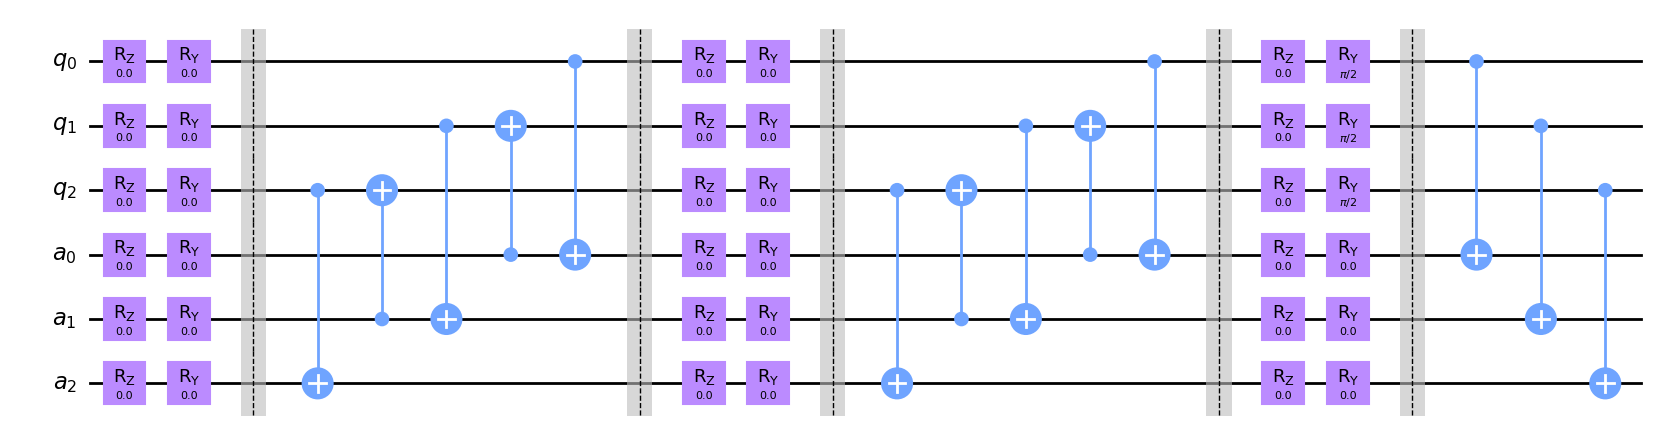

In [47]:
from gibbs.preparation.varqite import efficientTwoLocalansatz
ansatz,x0=efficientTwoLocalansatz(3,2,"reverse_linear",no_hadamart=True,barriers=True)
ansatz.bind_parameters(x0).decompose().draw(output="mpl")